Ejercicio Preprocesamiento Redes Neuronales

Abre el NoteBook `Intro Keras`. A continuación navega hasta la sección “Secuencial” dentro del bloque “Ejemplos prácticos de estructuras de capas”. El primer ejemplo hace referencia a un problema de clasificación multiclase sobre `iris dataset.` realiza las siguientes pruebas:

1. Cambia la normalización de los datos de entrada realizada con `StandarScaler`  por una normalización realizada con `Normalization.`  ¿Cómo cambian los resultados?
	- La precisión del modelo se mantiene igual.
	- La salida de las capas densas (entrada, oculta y salida) pasa a ser desconocida.
	- La predicción realizada para probar el modelo es correcta.

2. Cambia la codificación realizada con `to_categorical (One Hot Encoding)`  por una codificación realizada con `Integer encoding`. ¿Cómo cambian los resultados?
	- La precisión del modelo se mantiene igual.
	- La salida de las capas densas (entrada, oculta y salida) pasa a ser desconocida.
	- La predicción realizada para probar el modelo es correcta.

3. ¿Podemos hacer algo para intentar aumentar la precisión del modelo? ¿Qué?
	- Añadir mas capas ocultas: Al añadir una capa oculta se observa una bajada de precisión de un 90% a un 80%
	- Añadir mas neuronas por capa: Al aumentar el número de neuronas en la capa oculta la precisión no se ve afectada y 	permanece en 90%
	- Aumentar las épocas de entrenamiento: Al subir el número de épocas de 50 a 150 se observa una subida de precisión 	de 	90% a 97%, incluso 100% en algún caso.

In [2]:
# !pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# === Carga y preprocesamiento de datos (Iris) ===

# Cargar datos
iris = load_iris()
X = iris.data
y = iris.target

y = tf.keras.utils.to_categorical(y, 3)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento
# Capa de normalización
normalizer = Normalization()
# Normalizador de variables categóricas
encoder = LabelEncoder()

# "Adaptación" del normalizador a los datos de entrenamiento
normalizer.adapt(X_train)
# Codificación de las variables categóricas a predecir
# y_train = encoder.fit_transform(y_train)
# y_test = encoder.transform(y_test)

c:\Users\SergioSF\Desktop\Programacion de Modelos de IA\Ejercicios y apuntes\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (120, 4)               │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (40.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 9 (40.00 B)

Precisión (Sequential): 1.00


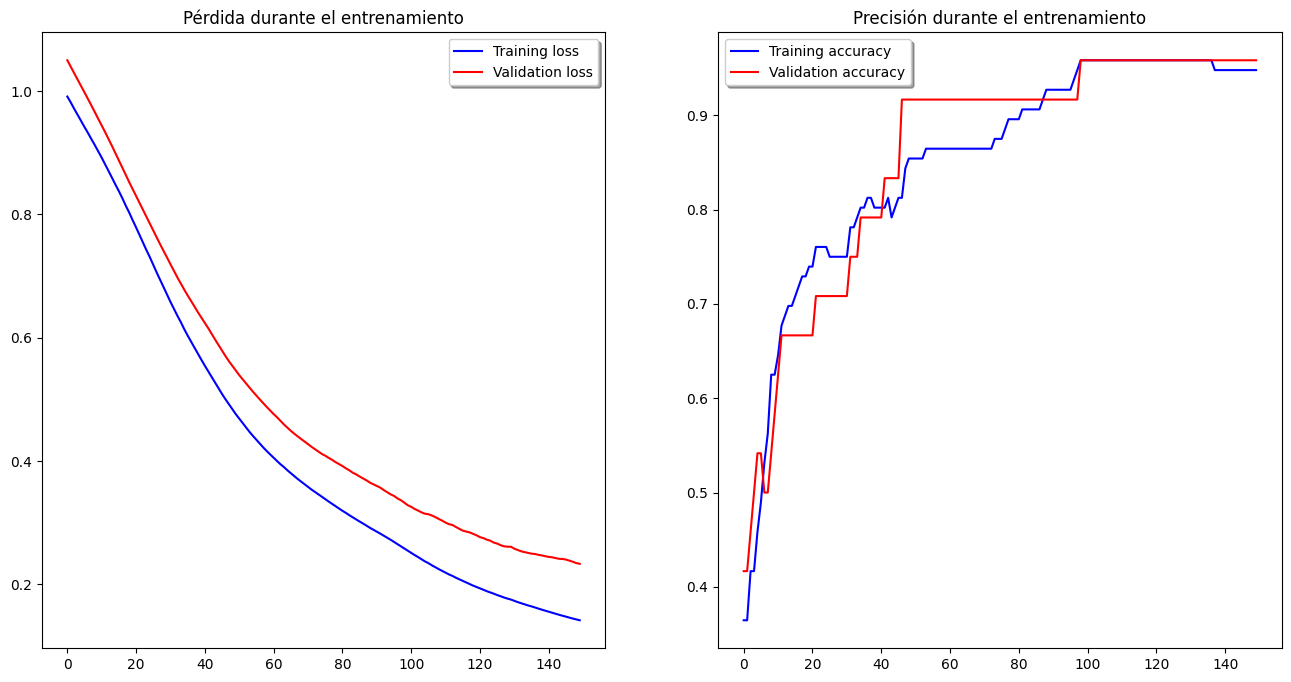


Entrada #0: [6.1 2.8 4.7 1.2]
Etiqueta real: 1
Etiqueta predicha: 1
Correcto


In [3]:
# === Definición del modelo ===
model = Sequential([
    normalizer,
    Dense(10, activation='relu', input_shape=(4,)),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')  # 3 clases
])

# Mostrar resumen del modelo
model.summary()

# === Compilación y entrenamiento ===
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=150, validation_split=0.2, verbose=0)

# === Evaluación ===
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión (Sequential): {accuracy:.2f}")

# === Gráficos del entrenamiento ===
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pérdida
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title('Pérdida durante el entrenamiento')

# Precisión
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Precisión durante el entrenamiento')

plt.show()

# === Predicción de un ejemplo concreto ===
i = 0
predictions = model.predict(X_test, verbose=0)

# Entrada
print(f"\nEntrada #{i}: {X_test[i]}")

# Etiqueta real
real = np.argmax(y_test[i])
print(f"Etiqueta real: {real}")

# Predicción
pred = np.argmax(predictions[i])
print(f"Etiqueta predicha: {pred}")

# Verificación
print("Correcto" if pred == real else "Incorrecto")


In [4]:
# === Predicción de un ejemplo concreto ===
predictions = model.predict(X_test, verbose=0)

for i in range(len(X_test)):
    # Entrada
    print(f"\nEntrada #{i}: {X_test[i]}")

    # Etiqueta real
    real = np.argmax(y_test[i])
    print(f"Etiqueta real: {real}")

    # Predicción
    pred = np.argmax(predictions[i])
    print(f"Etiqueta predicha: {pred}")

    # Verificación
    print("Correcto" if pred == real else "Incorrecto")


Entrada #0: [6.1 2.8 4.7 1.2]
Etiqueta real: 1
Etiqueta predicha: 1
Correcto

Entrada #1: [5.7 3.8 1.7 0.3]
Etiqueta real: 0
Etiqueta predicha: 0
Correcto

Entrada #2: [7.7 2.6 6.9 2.3]
Etiqueta real: 2
Etiqueta predicha: 2
Correcto

Entrada #3: [6.  2.9 4.5 1.5]
Etiqueta real: 1
Etiqueta predicha: 1
Correcto

Entrada #4: [6.8 2.8 4.8 1.4]
Etiqueta real: 1
Etiqueta predicha: 1
Correcto

Entrada #5: [5.4 3.4 1.5 0.4]
Etiqueta real: 0
Etiqueta predicha: 0
Correcto

Entrada #6: [5.6 2.9 3.6 1.3]
Etiqueta real: 1
Etiqueta predicha: 1
Correcto

Entrada #7: [6.9 3.1 5.1 2.3]
Etiqueta real: 2
Etiqueta predicha: 2
Correcto

Entrada #8: [6.2 2.2 4.5 1.5]
Etiqueta real: 1
Etiqueta predicha: 1
Correcto

Entrada #9: [5.8 2.7 3.9 1.2]
Etiqueta real: 1
Etiqueta predicha: 1
Correcto

Entrada #10: [6.5 3.2 5.1 2. ]
Etiqueta real: 2
Etiqueta predicha: 2
Correcto

Entrada #11: [4.8 3.  1.4 0.1]
Etiqueta real: 0
Etiqueta predicha: 0
Correcto

Entrada #12: [5.5 3.5 1.3 0.2]
Etiqueta real: 0
Etiqueta pred